In [238]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.express as px # data visualization
import seaborn as sns # data visualization

from IPython.display import display, HTML

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Display Max Rows, Columns, Width
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

/kaggle/input/fifa-21-complete-player-dataset/players_15.csv
/kaggle/input/fifa-21-complete-player-dataset/players_16.csv
/kaggle/input/fifa-21-complete-player-dataset/players_17.csv
/kaggle/input/fifa-21-complete-player-dataset/players_18.csv
/kaggle/input/fifa-21-complete-player-dataset/players_19.csv
/kaggle/input/fifa-21-complete-player-dataset/players_21.csv
/kaggle/input/fifa-21-complete-player-dataset/Career Mode player datasets - FIFA 15-21.xlsx
/kaggle/input/fifa-21-complete-player-dataset/players_20.csv


**Importing the dataset**

In [239]:
df = pd.read_csv('/kaggle/input/fifa-21-complete-player-dataset/players_21.csv')

**Exploratory Data Analysis**

In [240]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [241]:
df.shape

(18944, 106)

In [242]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [243]:
# Create a list of all the skills for every player 
skills = []
for i in df.columns:
    skills.append(i)
skills

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed

In [244]:
# Check for the null values in every column
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

In [245]:
# Selecting particular number of columns to impute values 

# Columns selected for imputation are - pace, shooting, passing, dribbling, defending, physic

col_impute = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']
fill_values = df.loc[:,col_impute]

print('Dataset with null values')
print("")
print(df.loc[:,col_impute].head())
print('----------------------------------------------------------')

for i in fill_values.columns:
    df[i].fillna(df[i].mean(), inplace=True)

print('Dataset after imputation')
print("")
print(df.loc[:,col_impute].head())

Dataset with null values

   pace  shooting  passing  dribbling  defending  physic
0  85.0      92.0     91.0       95.0       38.0    65.0
1  89.0      93.0     81.0       89.0       35.0    77.0
2   NaN       NaN      NaN        NaN        NaN     NaN
3  78.0      91.0     78.0       85.0       43.0    82.0
4  91.0      85.0     86.0       94.0       36.0    59.0
----------------------------------------------------------
Dataset after imputation

       pace   shooting    passing  dribbling  defending     physic
0  85.00000  92.000000  91.000000   95.00000  38.000000  65.000000
1  89.00000  93.000000  81.000000   89.00000  35.000000  77.000000
2  67.66811  52.274954  57.139434   62.45543  51.316292  64.458988
3  78.00000  91.000000  78.000000   85.00000  43.000000  82.000000
4  91.00000  85.000000  86.000000   94.00000  36.000000  59.000000


**Plotting count of players based on their heights**

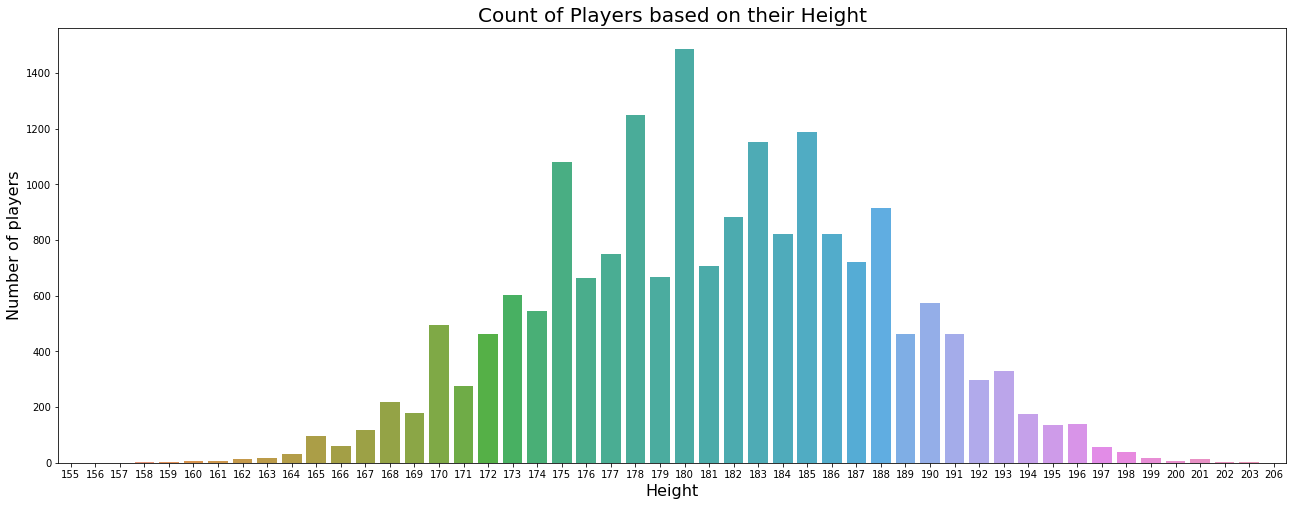

In [246]:
# Distribution of Height of the players

plt.figure(figsize=(22,8))
ax = sns.countplot(x='height_cm',data=df)
ax.set_title(label='Count of Players based on their Height',fontsize=20)
ax.set_xlabel(xlabel='Height',fontsize=16)
ax.set_ylabel(ylabel='Number of players',fontsize=16)
plt.show()

**Plotting Height v/s Dribbling**

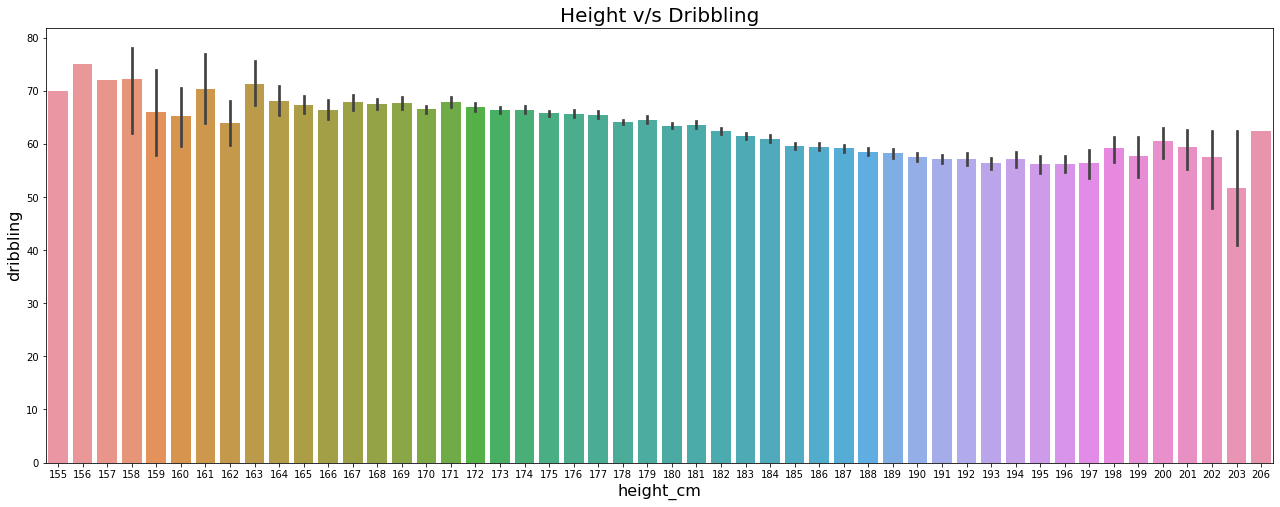

In [247]:
plt.figure(figsize=(22,8))
plt.xlabel(xlabel="Height",fontsize=16)
plt.ylabel(ylabel="Dribbling",fontsize=16)
plt.title("Height v/s Dribbling",fontsize=20)
sns.barplot(x='height_cm',y='dribbling',data = df.sort_values('height_cm', inplace=False))
plt.show()

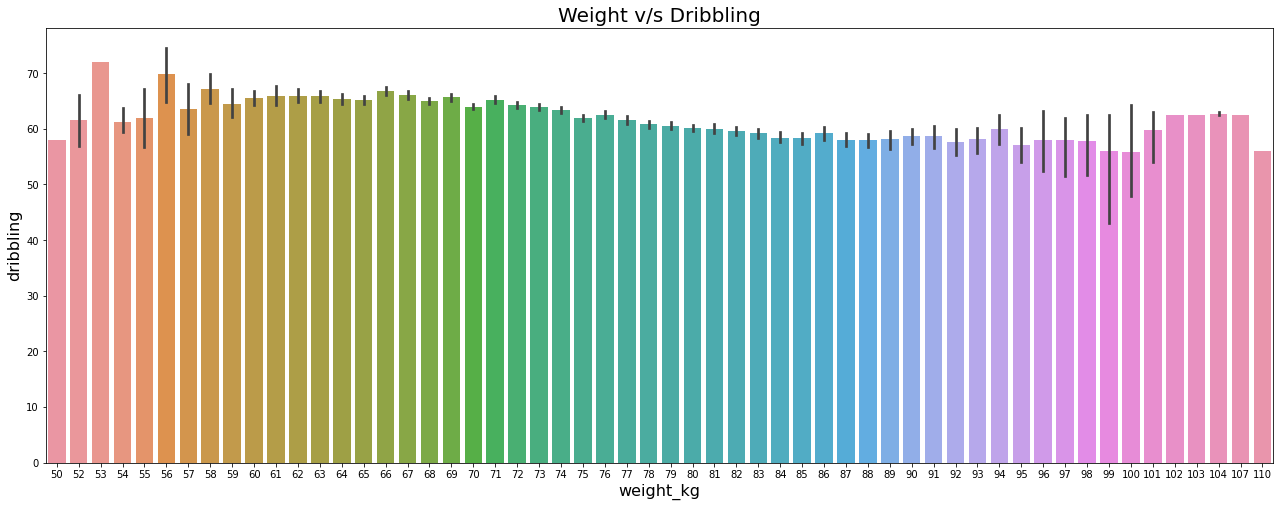

In [248]:
plt.figure(figsize=(22,8))
plt.xlabel(xlabel="Weight",fontsize=16)
plt.ylabel(ylabel="Dribbling",fontsize=16)
plt.title("Weight v/s Dribbling",fontsize=20)
sns.barplot(x='weight_kg',y='dribbling',data = df.sort_values('weight_kg', inplace=False))
plt.show()

What we can see here is that height affects dribbling more than weight

**Messi v/s Ronaldo**

Based on some particular skillsets we try to analyze the who is better - Messi or Ronaldo?

In [249]:
skills_messi_ronaldo = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [250]:
messi = df.loc[df['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns=skills_messi_ronaldo)

ronaldo = df.loc[df['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns=skills_messi_ronaldo)

In [251]:
print("Messi Data")
messi

Messi Data


,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
0,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94


In [252]:
print("Ronaldo Data")
ronaldo

Ronaldo Data


,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
1,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93


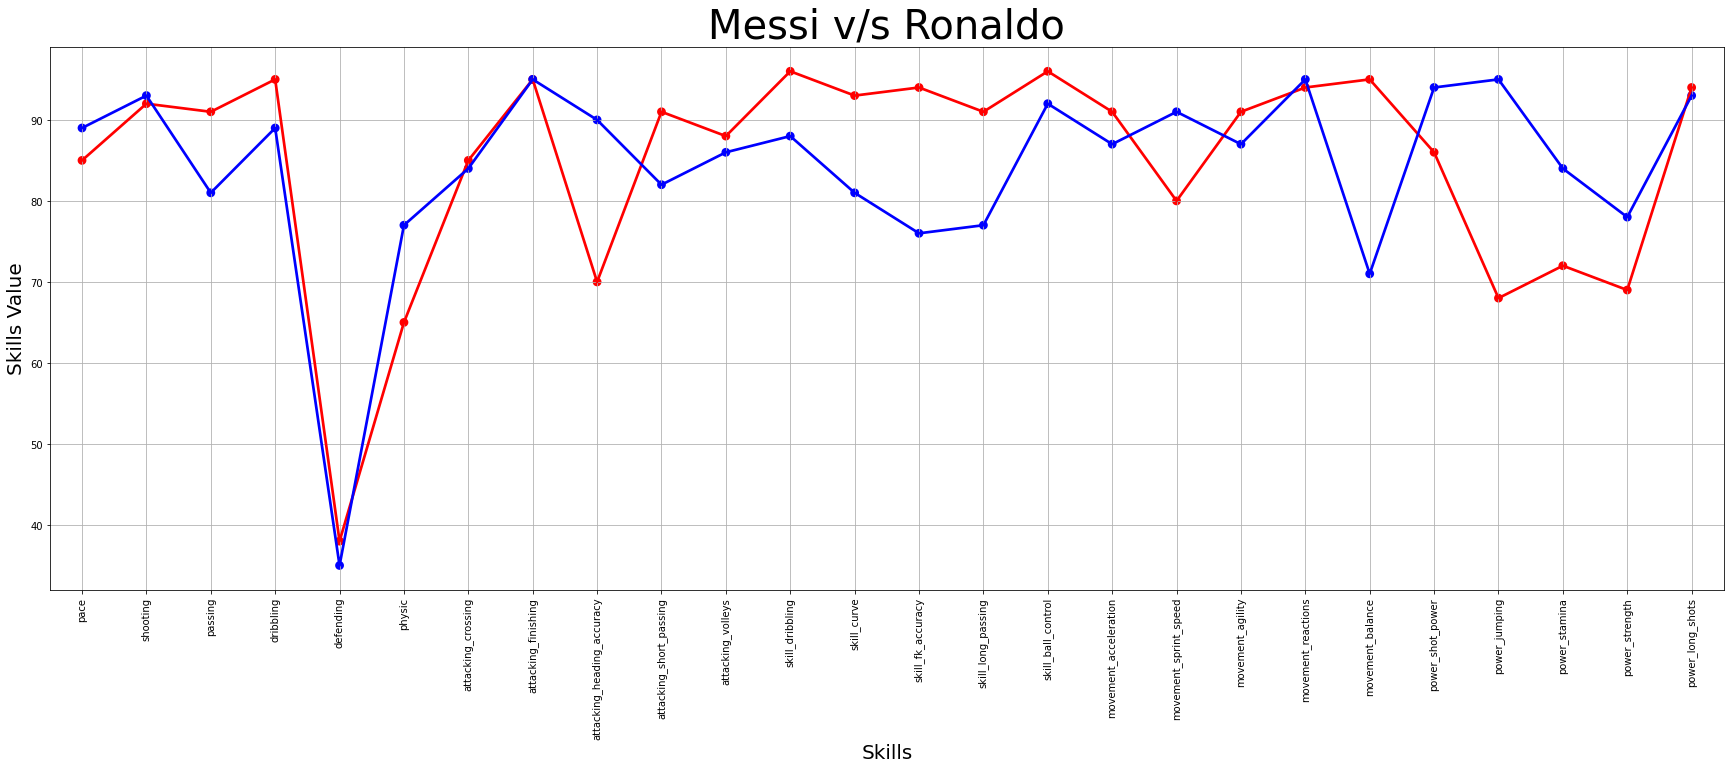

In [253]:
plt.figure(figsize=(30,10))
sns.pointplot(data=messi, color='red', alpha=0.6)
sns.pointplot(data=ronaldo, color='blue',alpha=0.6)
plt.title("Messi v/s Ronaldo", fontsize=40)
plt.xticks(rotation=90)
plt.xlabel("Skills",fontsize = 20)
plt.ylabel("Skills Value", fontsize=20)
plt.grid()

**Top 10 Players based on Overall Skills**

In [254]:
display(HTML(df.sort_values('overall', ascending=False)[['short_name','overall']][:10].to_html(index=False)))

short_name,overall
L. Messi,93
Cristiano Ronaldo,92
J. Oblak,91
R. Lewandowski,91
Neymar Jr,91
K. De Bruyne,91
Alisson,90
S. Mané,90
M. Salah,90
V. van Dijk,90


**Top 5 Nations with Overall Best Player**

In [255]:
top_nations = df.groupby(['nationality'])['overall'].max().sort_values(ascending=False).head()
top_nations

nationality
Argentina    93
Portugal     92
Poland       91
Brazil       91
Slovenia     91
Name: overall, dtype: int64

**Top 5 Clubs with Overall Best Player**

In [256]:
top_clubs = df.groupby(['club_name'])['overall'].max().sort_values(ascending=False).head()
top_clubs

club_name
FC Barcelona           93
Juventus               92
Atlético Madrid        91
Paris Saint-Germain    91
Manchester City        91
Name: overall, dtype: int64

**Age Distribution of Player in Countries**

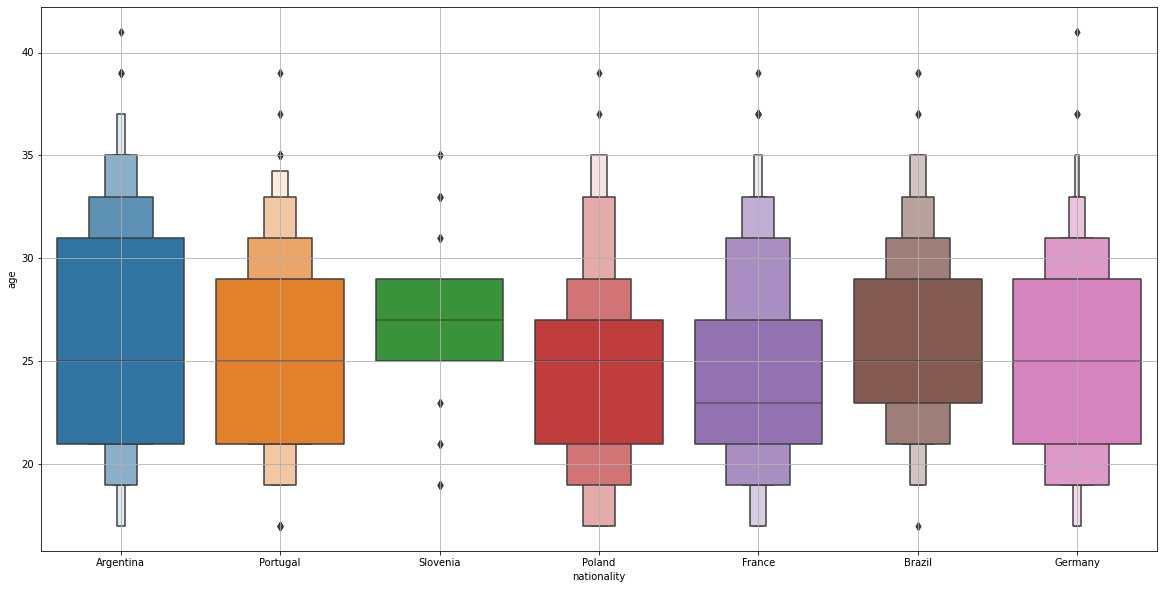

In [257]:
countries_names = ('Argentina',
                   'France',
                   'Germany',
                   'Portugal',
                   'Poland',
                   'Brazil',
                   'Slovenia')

countries = df.loc[df['nationality'].isin(countries_names) & df['age']]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.boxenplot(x='nationality',y='age',data=countries)
plt.grid()

**Age Distribution of Players in Clubs**

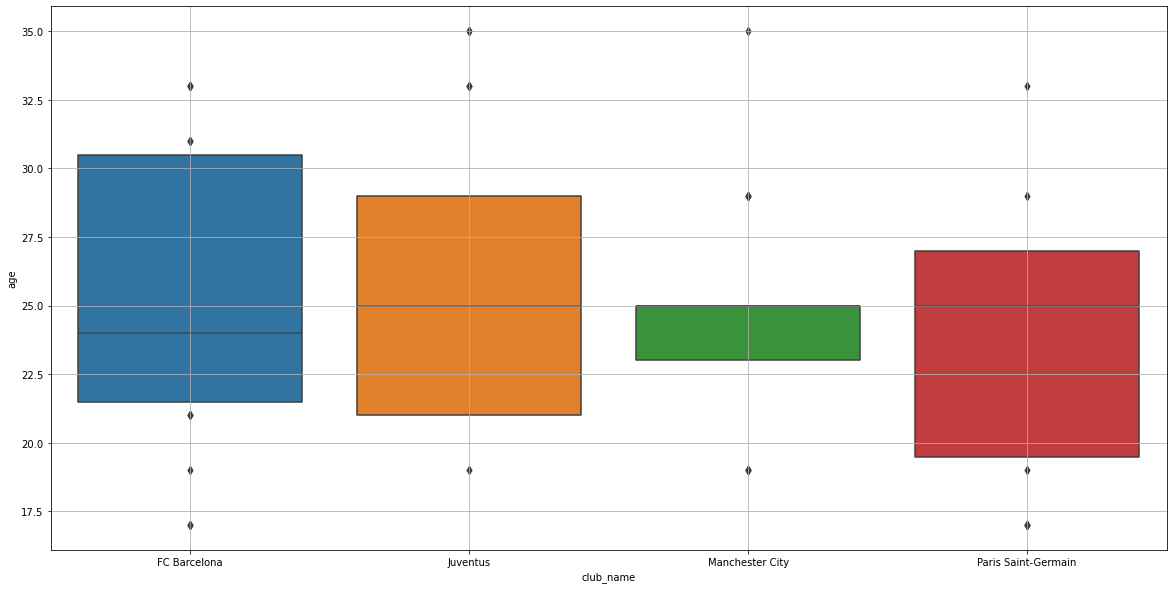

In [258]:
club_names = ('FC Barcelona','Paris Saint-Germain','Manchester City','Juventus')

clubs = df.loc[df['club_name'].isin(club_names) & df['age']]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.boxenplot(x='club_name',y='age',data=clubs)
plt.grid()

**Nationwise Player counts and Average Potential**

In [259]:
best_avg_overall = df.groupby('nationality').apply(lambda x: np.average(x['overall'])).reset_index(name='Overall Ratings')
best_avg_player = df.groupby('nationality').apply(lambda x: x['overall'].count()).reset_index(name='Player Counts')

In [262]:
best_avg_count = pd.merge(best_avg_overall,best_avg_player,how='inner',left_on='nationality',right_on = 'nationality')
best_avg_top = best_avg_count[best_avg_count['Player Counts'] > 200]
best_avg_top.sort_values(by = ['Overall Ratings','Player Counts'], ascending = False)
px.scatter(best_avg_top, x='Overall Ratings',y='Player Counts',color = 'Player Counts', hover_data = ['nationality'])

**Top Footballers in Fifa 21 Game**

In [263]:
top_play = df[['short_name','overall','age','club_name']]
top_play.sort_values(by='overall',ascending=False,inplace=True)
top_30_play = top_play[:30]
fig = px.scatter(top_30_play, x='age',y='overall',color='age',hover_data=['short_name','club_name'])
fig.show()